# **Introduction:**

* One interesting application of K-means clustering is image quantization.

* Our gray scale image has values between 0 - 255. We divid all these values with 255 to make them between 0 and 1.

* Color images are RGB images and are shown as: (height, width, color channels)

* Suppose, our color images has many colors in it. We can make clusters of almost same colors and can convert the image to have 'k' number of colors.


# **Reshaping Image to Convert to Features:**

We can convert the image pixel values to three features of R, G and B as:

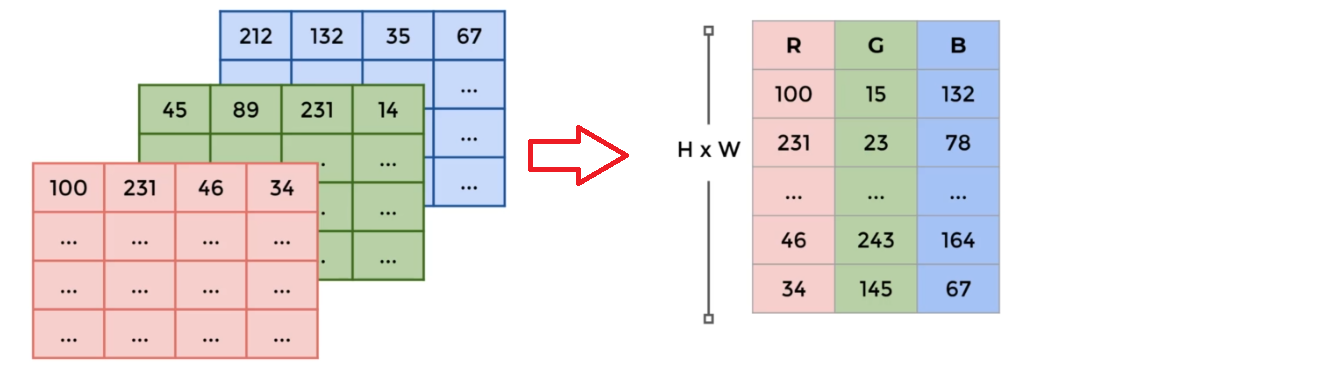



Keep in mind, now the data has H x W number of rows and 3 columns/features. So new size is: **(HxW, 3)**

Summary:

**'Color quantization in K-means refers to the process of reducing the number of distinct colors in an image by grouping similar colors together. K-means clustering is utilized as a technique to achieve this color reduction.'**





# **----------------------- Coding ------------------**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image_as_array = mpimg.imread('/content/sample_data/palm_trees.jpg')

In [3]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [4]:
image_as_array.shape

(1401, 934, 3)

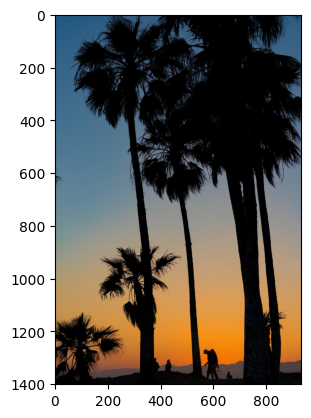

In [5]:
plt.imshow(image_as_array)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_2d = image_as_array.reshape(h*w, c)

In [9]:
image_2d.shape

(1308534, 3)

In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6)
labels = model.fit_predict(image_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
model.cluster_centers_

array([[191.64334714, 154.52820231, 109.43941241],
       [ 67.01342053,  61.32732205,  61.81039567],
       [ 71.13910147, 109.26160944, 137.66116984],
       [219.02019951, 135.39076975,  46.95290635],
       [  2.73839604,   2.55699856,   3.68040568],
       [136.91783578, 143.799135  , 143.9135323 ]])

Let's round these numbers to get perfect pixel values jesa k original image me hoti hain.

In [16]:
rgb_codes = model.cluster_centers_.round(0).astype('int')

rgb_codes

array([[192, 155, 109],
       [ 67,  61,  62],
       [ 71, 109, 138],
       [219, 135,  47],
       [  3,   3,   4],
       [137, 144, 144]])

Now, we have these features data.

and we have these labels:

In [15]:
labels

array([2, 2, 2, ..., 4, 4, 4], dtype=int32)

Here, these labels are the indexes of these rgb values. i.e. 2 means grab the second row, then 2 means grab second row again etc.

In [17]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

To show this quantized image now, we need to convert it back to 3D.

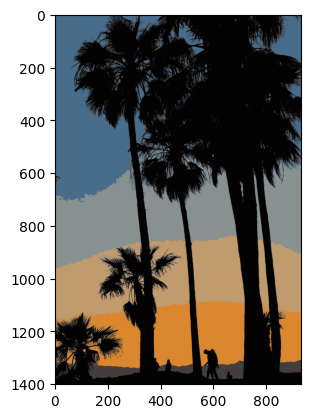

In [19]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))
plt.imshow(quantized_image);